In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).scalar()
recent_date

'2017-08-23'

In [10]:
temp_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))
temp_stats

Text(0, 0.5, 'inches')

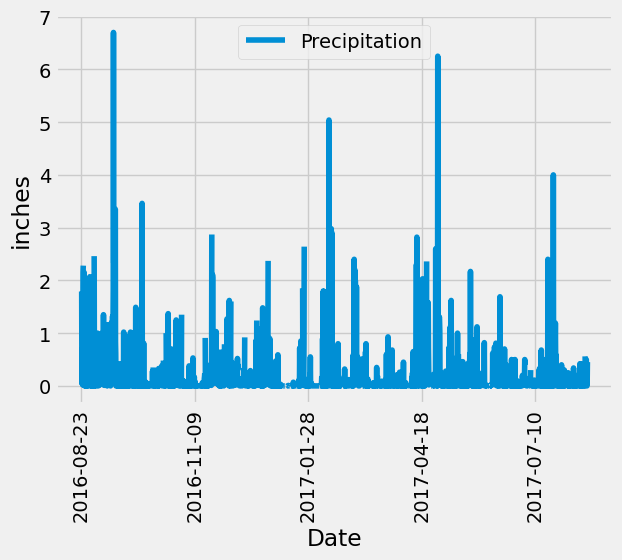

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 



# Calculate the date one year from the last date in data set.


date = dt.date(2017,8,23) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores

precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= date).all()



# Save the query results as a Pandas DataFrame. Explicitly set the column names

columns = ['Date', 'Precipitation']

df = pd.DataFrame(precipitation, columns=columns)

# Sort the dataframe by date
df = df.sort_values(by='Date')

# Convert the DataFrame to a dictionary
date_dict = df.to_dict(orient='records')
    
# # Use Pandas Plotting with Matplotlib to plot the data
df.plot(x="Date", y="Precipitation",rot=90)
plt.ylabel("inches")

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df['Precipitation'].describe()
summary_stats

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset


stations = session.query(func.count(Station.station)).scalar()
print(f"Total number of stations in the dataset: {stations}")


Total number of stations in the dataset: 9


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

print("Most Active Stations:")
for station, count in active_station:
    print(f"Station ID: {station}, Count: {count}")

Most Active Stations:
Station ID: USC00519281, Count: 2772
Station ID: USC00519397, Count: 2724
Station ID: USC00513117, Count: 2709
Station ID: USC00519523, Count: 2669
Station ID: USC00516128, Count: 2612
Station ID: USC00514830, Count: 2202
Station ID: USC00511918, Count: 1979
Station ID: USC00517948, Count: 1372
Station ID: USC00518838, Count: 511


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_id = active_station [0][0]

#calculate
temp_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == station_id).all()

#extraction
lowest_temp, highest_temp, avg_temp = temp_stats[0]

print(f"Most Active Station (ID:{station_id}) Temperature Stats:")
print(f"Lowest Temp: {lowest_temp} °F")
print(f"Highest Temp: {highest_temp} °F")
print(f"Average Temp: {avg_temp:.2f}°F")


Most Active Station (ID:USC00519281) Temperature Stats:
Lowest Temp: 54.0 °F
Highest Temp: 85.0 °F
Average Temp: 71.66°F


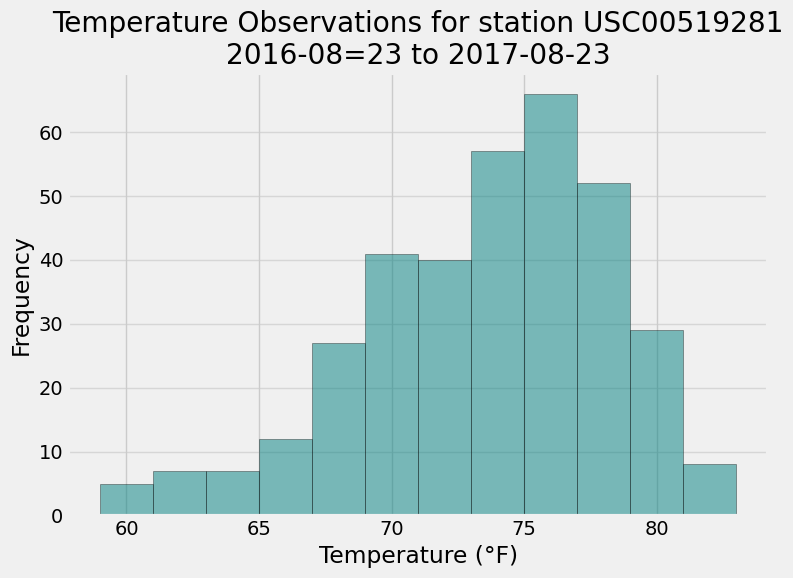

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
recent_date = session.query(func.max(Measurement.date)).scalar()
one_year = dt.datetime.strptime(recent_date, '%Y-%m-%d') -dt.timedelta(days=365)

#retrieve temp
temperature_data = session.query(Measurement.tobs).\
    filter(Measurement.station == station_id).\
    filter(Measurement.date >= one_year).all()

#save to DF
df_temp = pd.DataFrame(temperature_data, columns=['Temperature (°F)'])

#plot
plt.figure(figsize=(8, 6))
plt.hist(df_temp['Temperature (°F)'], bins=12, alpha=0.5, color='teal', edgecolor='black')
plt.title(f'Temperature Observations for station {station_id}\n{one_year.strftime("%Y-%m=%d")} to {recent_date}')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

# Close Session

In [17]:
# Close Session
session.close()